# Manpreet Dhindsa - COMP 541 - Random Forest Classifier Student Success Prediction

In [2]:
# Load data using Pandas
import pandas as pd
import os
def load_student_data(housing_path=r"C:\Users\mdhindsa\Documents\CSUN\Fall2023\COMP_541"):
    csv_path = os.path.join(housing_path, "processed_data.csv")
    return pd.read_csv(csv_path)
student = load_student_data()

In [3]:
# a) How many tuples does the student data set have? (Check out the data frame)
num_tuples, num_columns = student.shape
print("Number of tuples (rows) in the student dataset:", num_tuples)

Number of tuples (rows) in the student dataset: 4424


In [4]:
# b) How many features does the student data set have? Print a name list.
feature_names = student.columns[:-1] 
print("Number of features in the student dataset: " + str(len(feature_names)))
print("Features in the student dataset: " + str(feature_names.to_list()))

Number of features in the student dataset: 36
Features in the student dataset: ['marital_status', 'application_mode', 'application_order', 'course', 'daytime_evening_attendance', 'previous_qualification', 'previous_qualification_grade', 'nationality', 'mothers_qualification', 'fathers_qualification', 'mothers_occupation', 'fathers_occupation', 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade', 'curricular_units_1st_sem_without_evaluations', 'curricular_units_2nd_sem_credited', 'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations', 'unemployment_rate',

In [7]:
# c) What’s the data type for each feature?
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                4424 non-null   int64  
 1   application_mode                              4424 non-null   int64  
 2   application_order                             4424 non-null   int64  
 3   course                                        4424 non-null   int64  
 4   daytime_evening_attendance                    4424 non-null   int64  
 5   previous_qualification                        4424 non-null   int64  
 6   previous_qualification_grade                  4424 non-null   float64
 7   nationality                                   4424 non-null   int64  
 8   mothers_qualification                         4424 non-null   int64  
 9   fathers_qualification                         4424 non-null   i

In [4]:
# d) How many of each target do you have?
print("Count of each target in the student dataset: " + str(student['target'].value_counts()))

Count of each target in the student dataset: target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [3]:
# Bring in the categories using the dictionaries defined in processor.py
import processor

features_to_categorize = {
    'marital_status': processor.marital_status,
    'application_mode': processor.application_mode,
    'course': processor.course,
    'daytime_evening_attendance': processor.daytime_attendance,
    'previous_qualification': processor.previous_qualification,
    'nationality': processor.nationality,
    'mothers_qualification': processor.mother_qualification,
    'fathers_qualification': processor.father_qualification,
    'mothers_occupation': processor.mother_occupation,
    'fathers_occupation': processor.father_occupation,
    'displaced': processor.displaced,
    'educational_special_needs': processor.educational_special_needs,
    'debtor': processor.debtor,
    'tuition_fees_up_to_date': processor.tuition_fees_up_to_date,
    'gender': processor.gender,
    'scholarship_holder': processor.scholarship,
    'international': processor.international
}

for feature in features_to_categorize:
    student[feature] = student[feature].map(features_to_categorize[feature])
    student[feature] = student[feature].astype('category')

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   marital_status                                4424 non-null   category
 1   application_mode                              4424 non-null   category
 2   application_order                             4424 non-null   int64   
 3   course                                        4424 non-null   category
 4   daytime_evening_attendance                    4424 non-null   category
 5   previous_qualification                        4424 non-null   category
 6   previous_qualification_grade                  4424 non-null   float64 
 7   nationality                                   4424 non-null   category
 8   mothers_qualification                         4424 non-null   category
 9   fathers_qualification                         4424 n

In [5]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

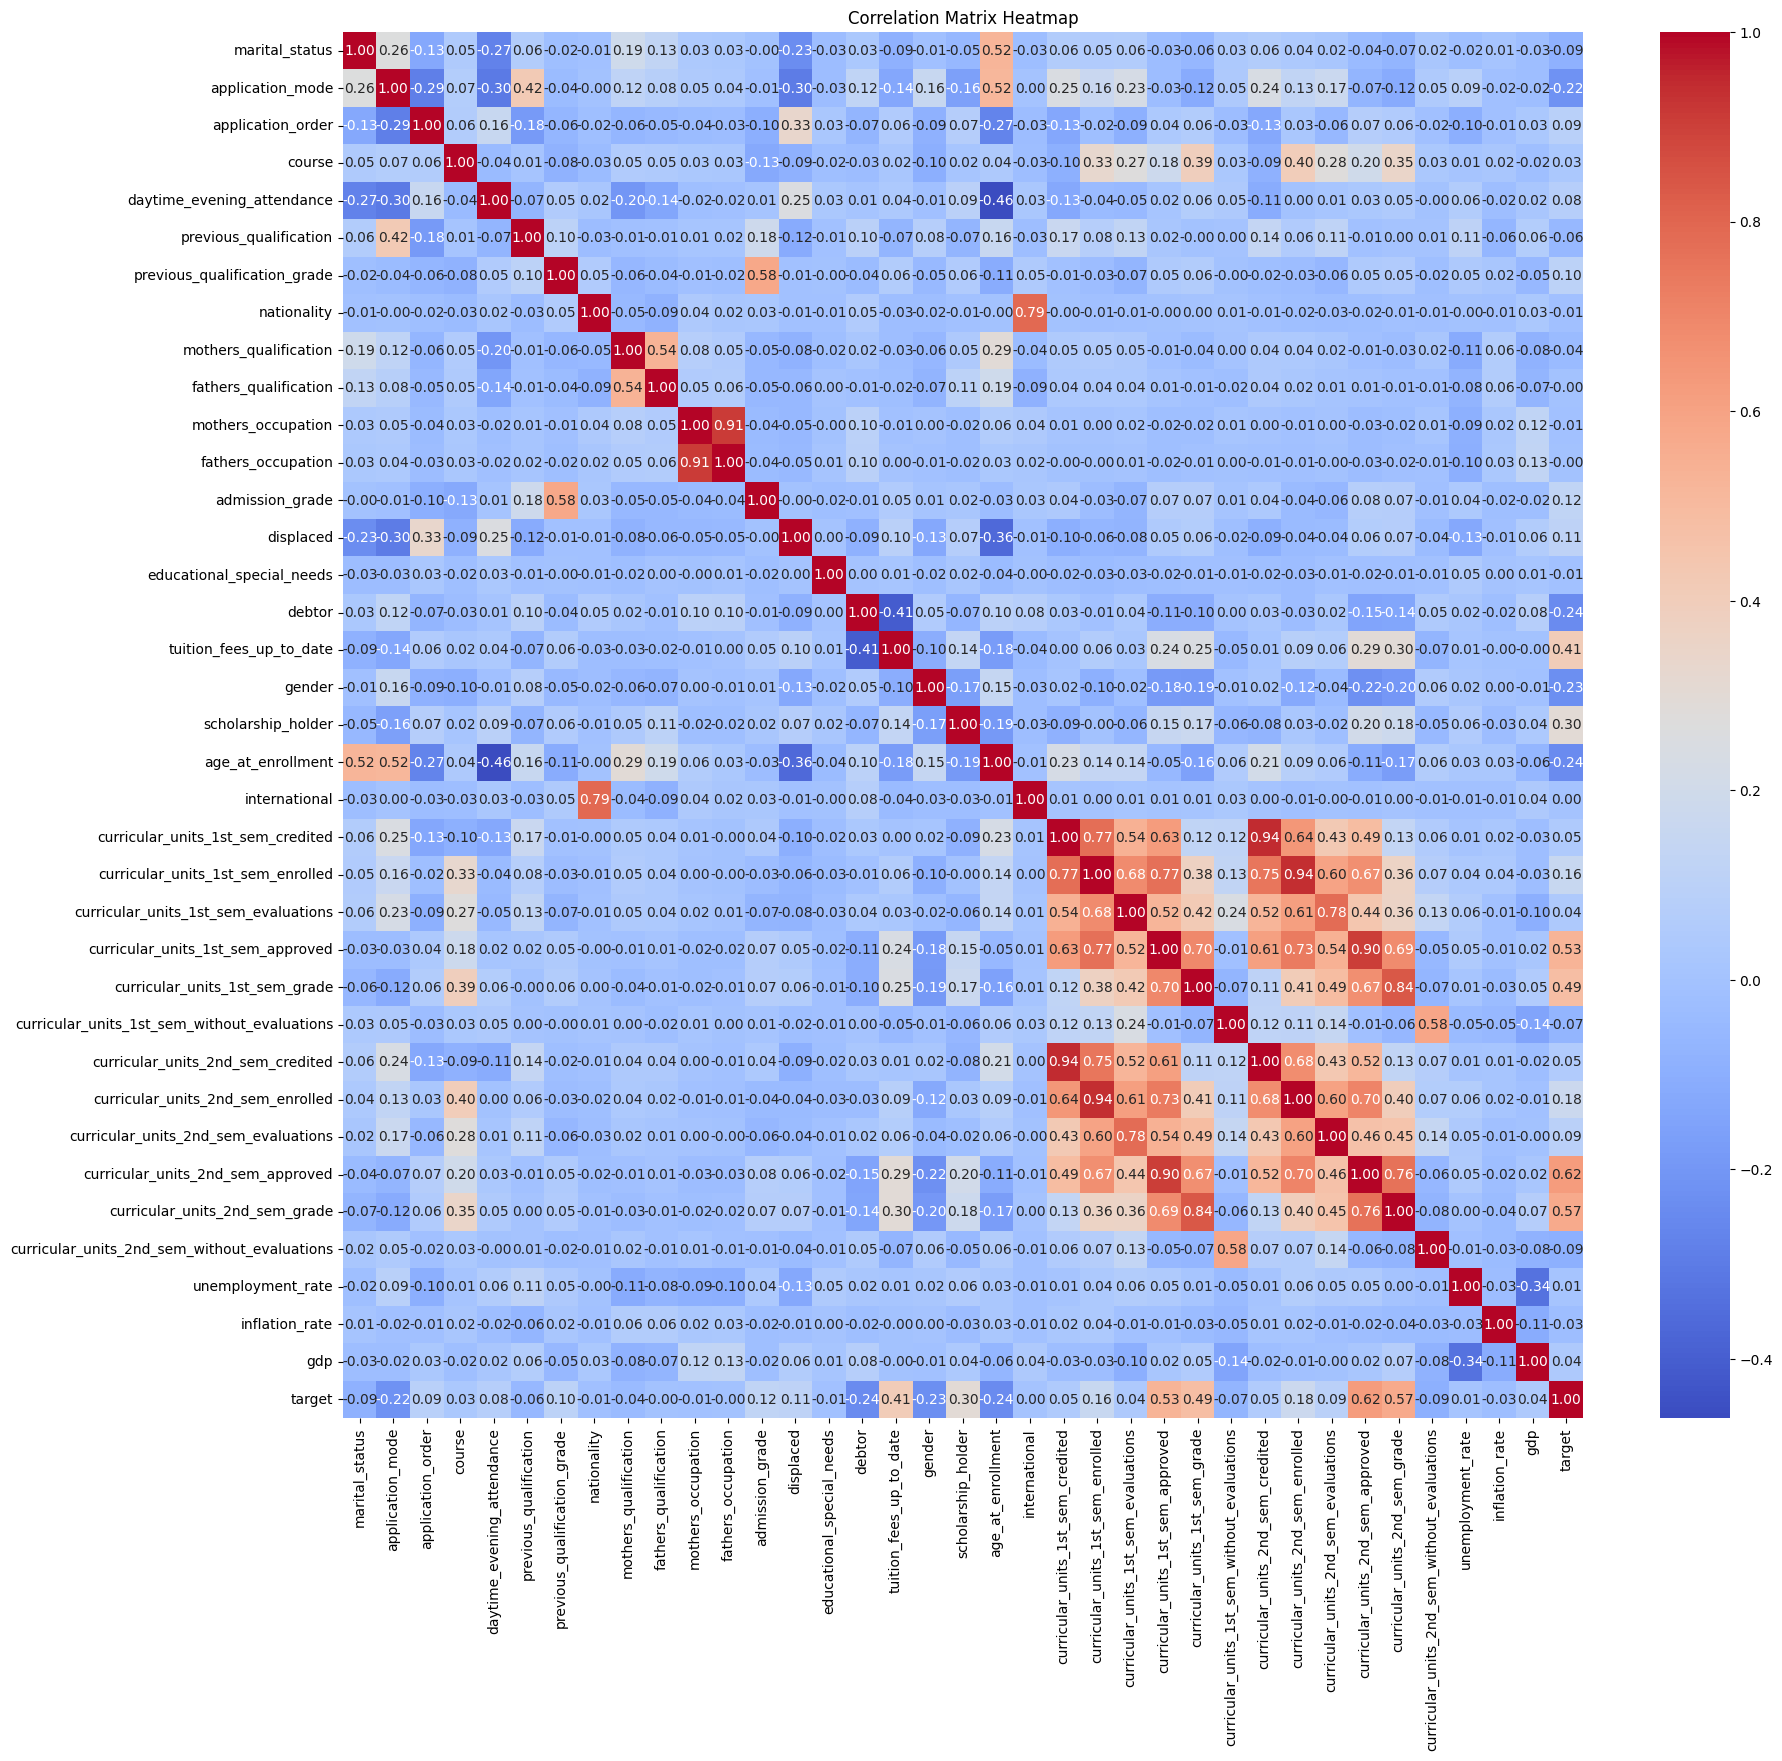

In [10]:
# Setup the correlation heat map

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Assuming 'target_column' is the name of the target attribute in your DataFrame
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target attribute
student['target'] = label_encoder.fit_transform(student['target'])

# Calculate the correlation matrix
correlation_matrix = student.corr()



# Create a heatmap
# Create a larger heatmap
plt.figure(figsize=(20, 18))
# Rotate axis labels for readability
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True)
# Reduce the size of y-axis labels
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

X = student.drop('target', axis=1)
y = student['target']

# Handles missing values in X - Uses the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7570621468926554


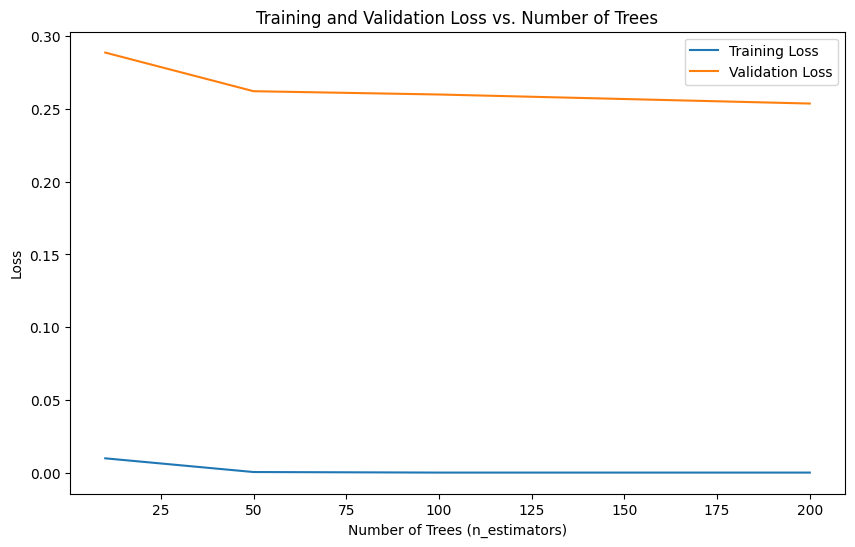

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = student.drop('target', axis=1)
y = student['target'] 

# Handles missing values in X - Uses the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

train_losses = []
valid_losses = []

n_estimators_values = [10, 50, 100, 200]

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    rf_classifier.fit(X_train, y_train)
    
    train_accuracy = rf_classifier.score(X_train, y_train)
    valid_accuracy = rf_classifier.score(X_valid, y_valid)
    
    train_losses.append(1 - train_accuracy)
    valid_losses.append(1 - valid_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_losses, label='Training Loss')
plt.plot(n_estimators_values, valid_losses, label='Validation Loss')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Number of Trees')
plt.legend()
plt.show()


Accuracy: 0.7333333333333333


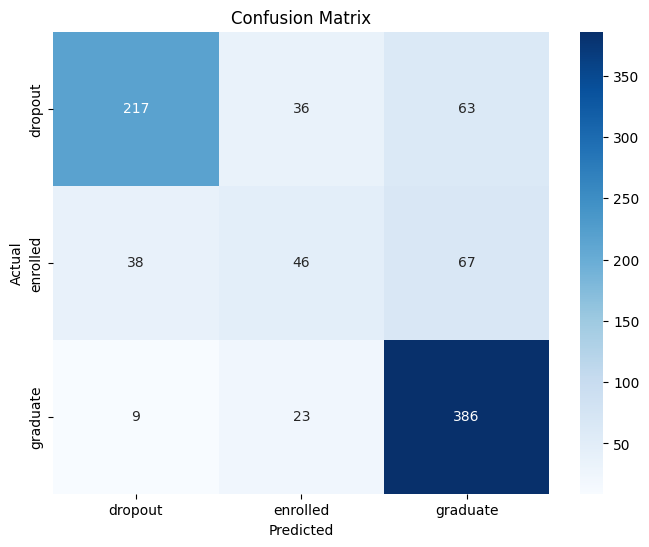

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Define your actual class names based on your dataset
class_names = ['dropout', 'enrolled', 'graduate']  # Map to your actual class labels

# Load your data into the 'student' DataFrame
# Assuming you have already loaded your data

# Handle missing values in X using the mean
X = student.drop('target', axis=1)
y = student['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Set x-axis labels to actual class names
            yticklabels=class_names)  # Set y-axis labels to actual class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
# Assuming you have the confusion_mat and class_names defined
class_count = len(class_names)

for i in range(class_count):
    class_name = class_names[i]

    # True Positives
    tp = confusion_mat[i, i]

    # False Positives
    fp = sum(confusion_mat[:, i]) - tp

    # True Negatives
    tn = sum(sum(confusion_mat)) - sum(confusion_mat[i, :]) - sum(confusion_mat[:, i]) + tp

    # False Negatives
    fn = sum(confusion_mat[i, :]) - tp

    print(f"{class_name}:")
    print(f"True {class_name}: {tp}")
    print(f"False {class_name}: {fp}")
    print(f"True {class_name} Rate: {tp / (tp + fn)}")
    print(f"False {class_name} Rate: {fp / (fp + tn)}")
    print()


dropout:
True dropout: 217
False dropout: 47
True dropout Rate: 0.6867088607594937
False dropout Rate: 0.08260105448154657

enrolled:
True enrolled: 46
False enrolled: 59
True enrolled Rate: 0.304635761589404
False enrolled Rate: 0.08038147138964577

graduate:
True graduate: 386
False graduate: 130
True graduate Rate: 0.9234449760765551
False graduate Rate: 0.278372591006424



In [6]:
# Random Oversampling - Fixes the imbalance
import pandas as pd
from sklearn.utils import resample

# Separate the three classes
df_class1 = student[student['target'] == 'Dropout']
df_class2 = student[student['target'] == 'Enrolled']
df_class3 = student[student['target'] == 'Graduate']

# Oversample the minority classes to match the majority class

# Oversample 'Class1'
df_class1_oversampled = resample(df_class1,
                                 replace=True, 
                                 n_samples=len(df_class3),
                                 random_state=42) 

# Oversample 'Class2'
df_class2_oversampled = resample(df_class2,
                                 replace=True,
                                 n_samples=len(df_class3),  
                                 random_state=42)

# Concatenate the oversampled classes with the majority class (Class3)
student_balanced = pd.concat([df_class1_oversampled, df_class2_oversampled, df_class3])

# Verify the new balanced dataframe
target_counts = student_balanced['target'].value_counts()
print(target_counts)


target
Dropout     2209
Enrolled    2209
Graduate    2209
Name: count, dtype: int64


In [7]:
#Remove the not correlation cols from the balanced student df
columns_to_remove = ['course', 'nationality', 'mothers_qualification', 'fathers_qualification', 
                     'mothers_occupation', 'fathers_occupation', 'educational_special_needs', 
                     'international', 'curricular_units_1st_sem_credited', 
                     'curricular_units_1st_sem_evaluations', 'curricular_units_2nd_sem_credited', 
                     'unemployment_rate', 'inflation_rate', 'gdp']

# student_cleaned is balanced and feature engineered
student_cleaned = student_balanced.drop(columns=columns_to_remove)
student_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6627 entries, 3564 to 4423
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   marital_status                                6627 non-null   int64  
 1   application_mode                              6627 non-null   int64  
 2   application_order                             6627 non-null   int64  
 3   daytime_evening_attendance                    6627 non-null   int64  
 4   previous_qualification                        6627 non-null   int64  
 5   previous_qualification_grade                  6627 non-null   float64
 6   admission_grade                               6627 non-null   float64
 7   displaced                                     6627 non-null   int64  
 8   debtor                                        6627 non-null   int64  
 9   tuition_fees_up_to_date                       6627 non-null   int

Accuracy: 0.9177978883861236


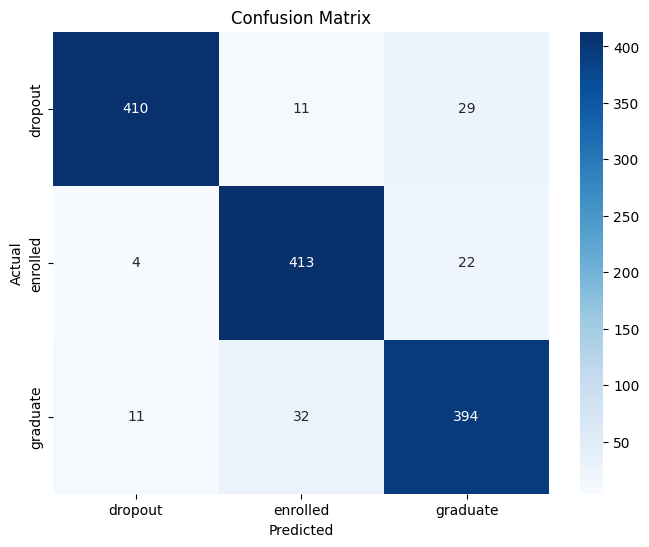

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

class_names = ['dropout', 'enrolled', 'graduate'] 

# Handle missing values in X using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X = student_cleaned.drop('target', axis=1)
y = student_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Set x-axis labels to actual class names
            yticklabels=class_names)  # Set y-axis labels to actual class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Calculate precision, recall, F1 score, and support
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     dropout       0.96      0.91      0.94       450
    enrolled       0.91      0.94      0.92       439
    graduate       0.89      0.90      0.89       437

    accuracy                           0.92      1326
   macro avg       0.92      0.92      0.92      1326
weighted avg       0.92      0.92      0.92      1326



In [11]:
# Calculate overall precision, recall, and F1 score
classification_rep = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
overall_metrics = classification_rep['macro avg']
print("Overall Classification Metrics:")
print("Precision:", overall_metrics['precision'])
print("Recall:", overall_metrics['recall'])
print("F1-Score:", overall_metrics['f1-score'])

Overall Classification Metrics:
Precision: 0.9186002983886241
Recall: 0.9178291430820842
F1-Score: 0.9178239737856657


In [18]:
#Remove the not correlation cols from the balanced student df
columns_to_remove = ['course', 'nationality', 'mothers_qualification', 'fathers_qualification', 
                     'mothers_occupation', 'fathers_occupation', 'educational_special_needs', 
                     'international', 'curricular_units_1st_sem_credited', 
                     'curricular_units_1st_sem_evaluations', 'curricular_units_2nd_sem_credited', 
                     'unemployment_rate', 'inflation_rate', 'gdp']

for column in columns_to_remove:
    if column in student_cleaned.columns:
        student_cleaned = student_cleaned.drop(columns=column)
    else:
        print(f"Column '{column}' not found in 'student_cleaned'.")

Column 'course' not found in 'student_cleaned'.
Column 'nationality' not found in 'student_cleaned'.
Column 'mothers_qualification' not found in 'student_cleaned'.
Column 'fathers_qualification' not found in 'student_cleaned'.
Column 'mothers_occupation' not found in 'student_cleaned'.
Column 'fathers_occupation' not found in 'student_cleaned'.
Column 'educational_special_needs' not found in 'student_cleaned'.
Column 'international' not found in 'student_cleaned'.
Column 'curricular_units_1st_sem_credited' not found in 'student_cleaned'.
Column 'curricular_units_1st_sem_evaluations' not found in 'student_cleaned'.
Column 'curricular_units_2nd_sem_credited' not found in 'student_cleaned'.
Column 'unemployment_rate' not found in 'student_cleaned'.
Column 'inflation_rate' not found in 'student_cleaned'.
Column 'gdp' not found in 'student_cleaned'.


Accuracy: 0.7310734463276836


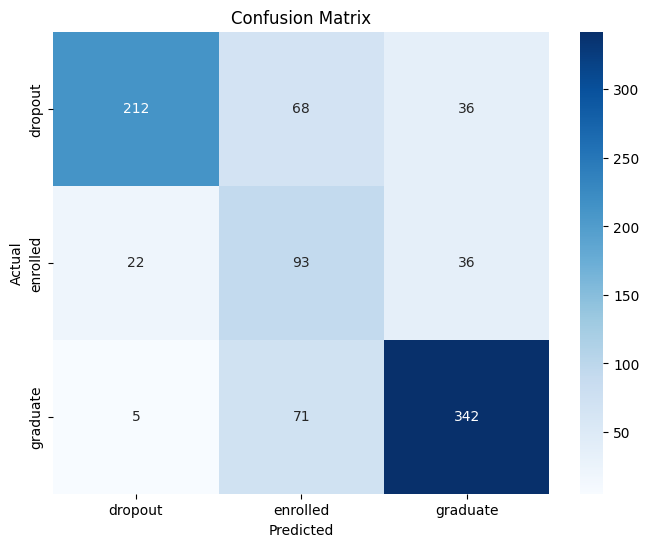

In [17]:
# Using Balanced Random Forest -> this thing is not good
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.ensemble import BalancedRandomForestClassifier  # Import BalancedRandomForest

class_names = ['dropout', 'enrolled', 'graduate']

# Assuming you've loaded your data into the 'student_cleaned' DataFrame
X = student.drop('target', axis=1)
y = student['target']

# Handle missing values using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use BalancedRandomForestClassifier instead of RandomForestClassifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)
brf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = brf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


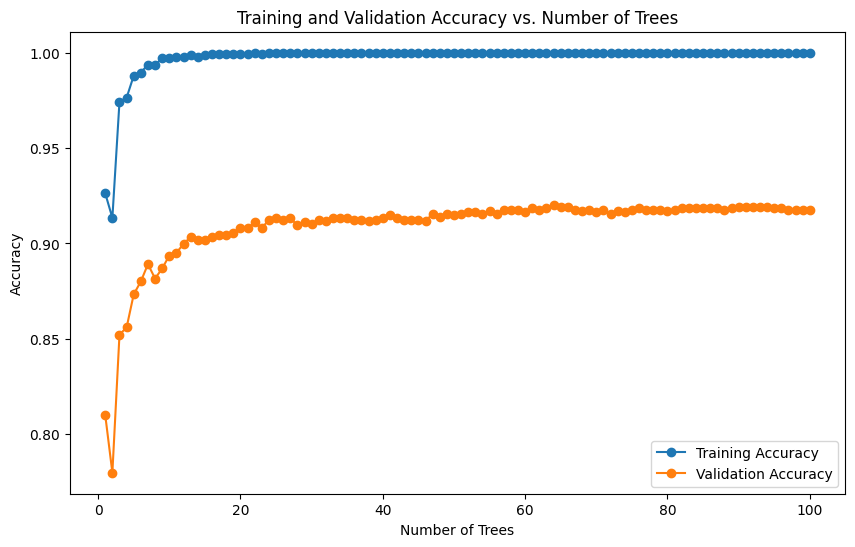

In [10]:
# Find over/under fitting 
# Verify over or under fitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

train_accuracies = []
val_accuracies = []
n_estimators_range = range(1, 101)  # Adjust this range as needed

# Handle missing values in X using the mean
X = student_cleaned.drop('target', axis=1)
y = student_cleaned['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    y_train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_val_pred = rf_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs. Number of Trees')
plt.show()


In [ ]:
# It stabilizes at around 30 trees, use 30 as limit to avoid overfitting. 
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

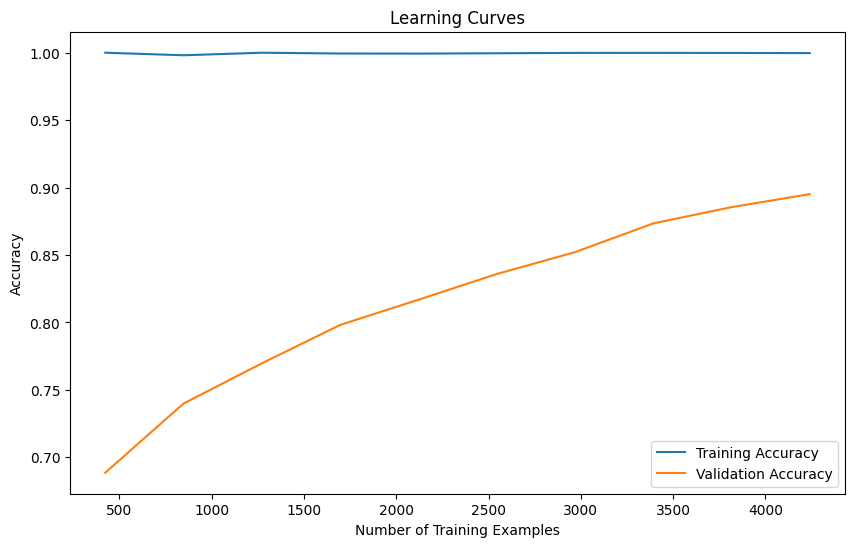

Accuracy: 0.9102564102564102


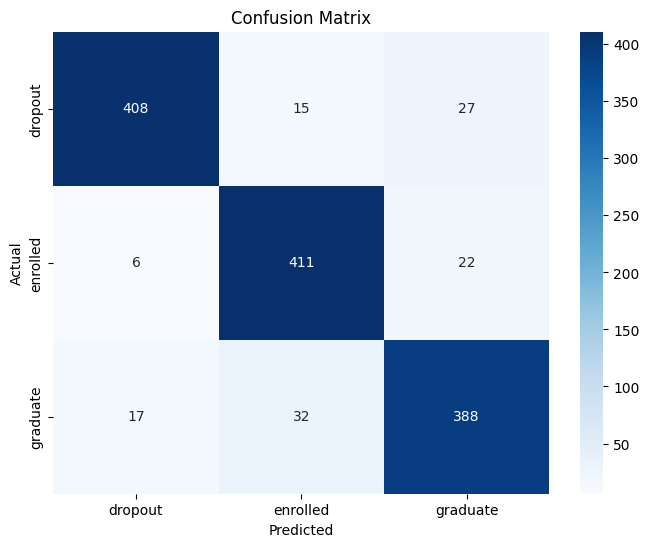

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Define your actual class names based on your dataset
class_names = ['dropout', 'enrolled', 'graduate']

# Load your data into the 'student' DataFrame
# Assuming you have already loaded your data

# Handle missing values in X using the mean
X = student_cleaned.drop('target', axis=1)
y = student_cleaned['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# Get the correlation matrix too
X = student_cleaned.drop('target', axis=1)
y = student_cleaned['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Set x-axis labels to actual class names
            yticklabels=class_names)  # Set y-axis labels to actual class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Ideas from looking at previous plots
# Try adding more data points are re-doing the Learning Curve, validation accuracy is still increasing at max size 
num_tuples, num_columns = student_cleaned.shape
print("Number of tuples (rows) in the adult dataset:", num_tuples)

Number of tuples (rows) in the adult dataset: 6627


In [16]:
import pandas as pd
import numpy as np

# Assuming 'adult_balanced' is your existing DataFrame
doubled_balanced = pd.concat([student_cleaned, student_cleaned], ignore_index=True)

num_tuples1, num_columns1 = doubled_balanced.shape
print("Number of tuples (rows) in the new adult dataset:", num_tuples1)

target_counts = doubled_balanced['target'].value_counts()
print(target_counts)

Number of tuples (rows) in the new adult dataset: 13254
target
Dropout     4418
Enrolled    4418
Graduate    4418
Name: count, dtype: int64


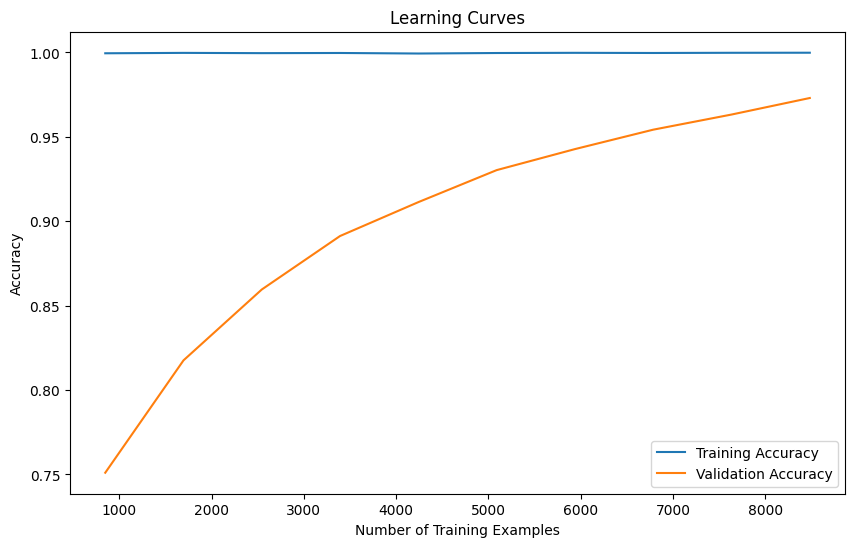

Accuracy: 0.985288570350811


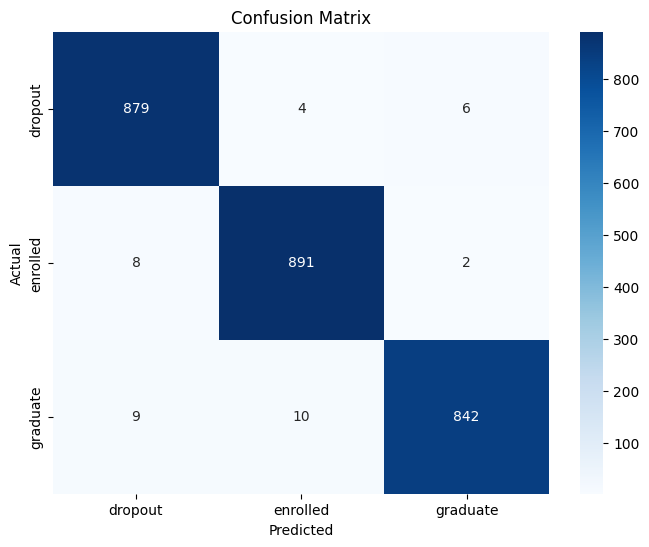

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Define your actual class names based on your dataset
class_names = ['dropout', 'enrolled', 'graduate']

# Load your data into the 'student' DataFrame
# Assuming you have already loaded your data

# Handle missing values in X using the mean
X = doubled_balanced.drop('target', axis=1)
y = doubled_balanced['target']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)

# Calculate and plot the learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# Get the correlation matrix too
X = doubled_balanced.drop('target', axis=1)
y = doubled_balanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap with actual class names
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Set x-axis labels to actual class names
            yticklabels=class_names)  # Set y-axis labels to actual class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()